# REGRESSION

### idea: use previous an current position (hi-2,hi-1,hi) to predict futur coordinate (hi+1) 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv', sep=',') # The entire dataset
print(data)

hmax=max(np.array(data.iloc[:,2]))
         
#features
him2 =hmax- np.array(data.iloc[:-3,2])
him1 = hmax-np.array(data.iloc[1:-2,2])
hi = hmax-np.array(data.iloc[2:-1,2]) 

#label
hip1 = hmax-np.array(data.iloc[3:,2]) 

##
X=np.array([him2,him1,hi])# Matrix of the features
y=hip1 # Matrix of the target
#randmat= np.random.randint(0,2,size=(1,len(y)))

X=np.transpose(X)
y=np.transpose(y)
print(X)
print(y)

#print(y)
#print(data) #print what's in the cancer_data.txt

            t   x    y
0    0.000000  92  192
1    0.041667  91  191
2    0.083333  91  192
3    0.125000  92  191
4    0.166667  92  190
..        ...  ..  ...
105  4.375000  38  890
106  4.416667  38  891
107  4.458333  39  892
108  4.500000  39  892
109  4.541667  39  893

[110 rows x 3 columns]
[[702 703 702]
 [703 702 703]
 [702 703 704]
 [703 704 703]
 [704 703 703]
 [703 703 702]
 [703 702 702]
 [702 702 700]
 [702 700 691]
 [700 691 671]
 [691 671 639]
 [671 639 639]
 [639 639 597]
 [639 597 542]
 [597 542 479]
 [542 479 400]
 [479 400 313]
 [400 313 313]
 [313 313 218]
 [313 218 107]
 [218 107   2]
 [107   2   2]
 [  2   2  60]
 [  2  60 139]
 [ 60 139 211]
 [139 211 271]
 [211 271 271]
 [271 271 322]
 [271 322 366]
 [322 366 398]
 [366 398 418]
 [398 418 419]
 [418 419 429]
 [419 429 431]
 [429 431 421]
 [431 421 400]
 [421 400 400]
 [400 400 369]
 [400 369 327]
 [369 327 274]
 [327 274 214]
 [274 214 214]
 [214 214 141]
 [214 141  58]
 [141  58  16]
 [ 58  16  77]
 [ 16  77 

In [40]:
from sklearn.model_selection import train_test_split #to split data
from sklearn.preprocessing import StandardScaler #to center & scale data


X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #split data

scalerX =StandardScaler()
X0_train=scalerX.fit_transform(X_train)

# REGRESSION

### LEAST SQUARE

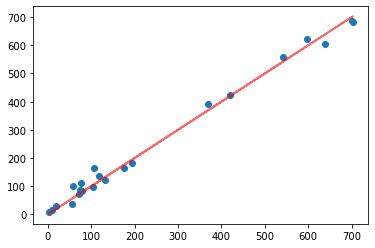

In [41]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# To do: 
# - use the function LinearRegression to fit the regression model to the data.
# - Plot the predicted values against the observed ones (parity plot).

# Hint:
# - The function documentation is in: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# - A simple user guide on the different linear regression models can be found here: https://scikit-learn.org/stable/modules/linear_model.html

LS_reg = LinearRegression().fit(X0_train, y_train) #create linear model from X & y
#print(LS_reg.score) #if 1 = exist a perfect linear relation

X0_test=scalerX.transform(X_test)
y_pred = LS_reg.predict(X0_test) #Predict using the linear model.

scat=plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, c='r',alpha=0.6)
plt.show()

### LASSO

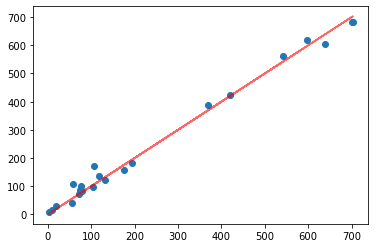

LS coefficients:[ -17.57198264 -101.1226551   322.91545325]
Lasso coefficients:[-31.03813617 -69.56124048 304.47793734]

LS weight:204.22081550932012
Lasso weight:203.878560689037

LS score:0.9832317128922082
Lasso score:0.9831405468529009



In [52]:
from sklearn.linear_model import Lasso

#alpha apply lasso if higher than **** and shrinckage else
#alpha=0 => same as Least Mean Square
#alpha increase => penalise more => make it more sparse 


alpha=0.1    #to change in order to know which  is best

clf = Lasso(alpha)
Lasso_reg = clf.fit(X0_train, y_train) #create linear model from X & y
#print(LS_reg.score) #if 1 = exist a perfect linear relation

X0_test=scalerX.transform(X_test)
y_pred = Lasso_reg.predict(X0_test) #Predict using the linear model.


scat=plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, c='r',alpha=0.6)
plt.show()


#### WEIGHTS
print('LS coefficients:'+str(LS_reg.coef_))
print("Lasso coefficients:"+str(Lasso_reg.coef_)+'\n')

LS_weight=sum(LS_reg.coef_)
Lasso_weight=sum(Lasso_reg.coef_)

print('LS weight:'+str(LS_weight))
print("Lasso weight:"+str(Lasso_weight)+'\n')

#### SCORES
LS_score=LS_reg.score(X0_train, y_train)
Lasso_score=Lasso_reg.score(X0_train, y_train)

print('LS score:'+str(LS_score))
print("Lasso score:"+str(Lasso_score)+'\n')

#LASSO has worst score than Least-Square 
#BUT better because Lasso simpler model since use less features (only 3 non-zero coefficients)
#so better than LS for avoiding overfitting,...


### LASSO CV

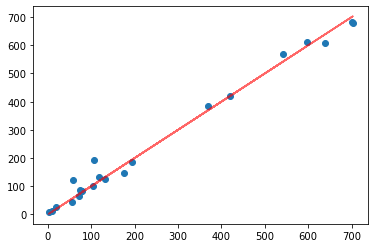

LassoCV alpha: 0.5879536104870301
Lasso alpha: 0.1


In [56]:
from sklearn.linear_model import LassoCV

cv=5 #will divide in 5 dataset and trying to find 5 different alpha for better fitting

clf = LassoCV(cv=5, random_state=0)
LassoCV_reg = clf.fit(X0_train, y_train) #create linear model from X & y

X0_test=scalerX.transform(X_test)
y_pred = LassoCV_reg.predict(X0_test) #Predict using the linear model.


scat=plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, c='r',alpha=0.6)
plt.show()

alphaCV=clf.alpha_

print('LassoCV alpha: '+str(alphaCV))
print('Lasso alpha: '+str(alpha))
#print(Laget_params(deep=True))


### RIDGE

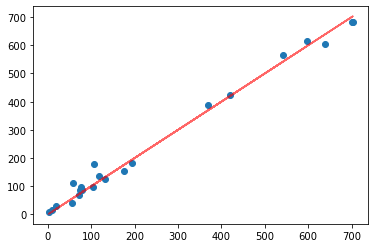

LS coefficients:[ -17.57198264 -101.1226551   322.91545325]
RidgeCV coefficients:[-41.4079122  -44.38962528 289.26085008]
LassoCV coefficients:[-55.26855376  -0.         258.39420397]

LS weight:204.22081550932012
RidgeCV weight:203.4633125994847
LassoCV weight:203.12565020560731

LS score:0.98323
RidgeCV score:0.98293
LassoCV score:0.98208



In [33]:
from sklearn.linear_model import RidgeCV

clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
RidgeCV_reg = clf.fit(X0_train, y_train) #create linear model from X & y

X0_test=scalerX.transform(X_test)
y_pred = RidgeCV_reg.predict(X0_test) #Predict using the linear model.


scat=plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, c='r',alpha=0.6)
plt.show()
         

#### WEIGHTS
print('LS coefficients:'+str(LS_reg.coef_))
print('RidgeCV coefficients:'+str(RidgeCV_reg.coef_))
print("LassoCV coefficients:"+str(LassoCV_reg.coef_)+'\n')

print('LS weight:'+str(sum(LS_reg.coef_)))
print('RidgeCV weight:'+str(sum(RidgeCV_reg.coef_)))
print("LassoCV weight:"+str(sum(LassoCV_reg.coef_))+'\n')

#### SCORES
print('LS score:'+str(np.round(LS_reg.score(X0_train, y_train),5)))
print('RidgeCV score:'+str(np.round(RidgeCV_reg.score(X0_train, y_train),5)))
print("LassoCV score:"+str(np.round(LassoCV_reg.score(X0_train, y_train),5))+'\n')


# PC

Explained variance ratio:
[9.82737930e-01 1.64607107e-02 8.01358884e-04]


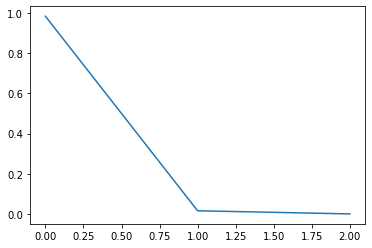

In [34]:
from sklearn.decomposition import PCA

pca = PCA() # n_components=64
pca.fit(X0_train)

print("Explained variance ratio:")
evr=pca.explained_variance_ratio_
print(evr)
#plt.scatter(np.arrange(X0_train.shape[1],evr))
plt.plot(pca.explained_variance_ratio_)
plt.show()

# To do: 
# - use the function PCA to trasform the feature matrix.
# - Plot the explained variance ratio.

# Hint:
# - The function documentation is in: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


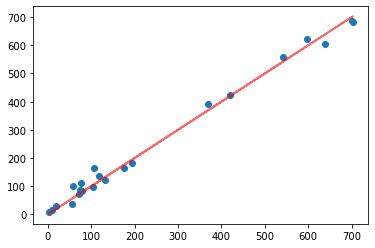

LS score:0.9832317128922082
PCR score:0.9912260441203387


In [35]:
A =pca.components_.T
Z_train=X0_train @A
Z_test=X0_test @A

PCR_reg= LinearRegression().fit(Z_train,y_train)
y_pred=PCR_reg.predict(Z_test)

scat=plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, c='r',alpha=0.6)
plt.show()


#### SCORES
print('LS score:'+str(LS_reg.score(X0_train, y_train)))
print('PCR score:'+str(PCR_reg.score(Z_test, y_test)))

#very different weights
#PCR has 2 benefits:
#    1. features become UNCORROLATED
#    2. reduce dimensionnality


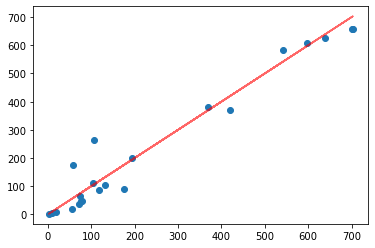

LS weight:204.22081550932012


In [57]:
# - Modify the number of PC scores used in the regression and track the resulting R2 score.
q=1
A =pca.components_.T
Z_train=X0_train @A[:,:q]
Z_test=X0_test @A[:,:q]


PCR_reg= LinearRegression().fit(Z_train,y_train)
y_pred=PCR_reg.predict(Z_test)

scat=plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, c='r',alpha=0.6)
plt.show()



#very different weights
#PCR has 2 benefits:
#    1. features become UNCORROLATED
#    2. reduce dimensionnality

print('LS weight:'+str(sum(LS_reg.coef_)))